In [1]:
import numpy as np
import sunpy
import sunpy.map
import aiapy
import aiapy.data.sample as sample_data
import matplotlib.pyplot as plt
from aiapy.calibrate import normalize_exposure, register, update_pointing

ModuleNotFoundError: No module named 'sunpy'

In [ ]:
dir(sample_data)

['AIA_094_IMAGE',
 'AIA_171_IMAGE',
 'AIA_193_IMAGE',
 'Path',
 '_SAMPLE_FILES',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '_key',
 'download_sample_data',
 'f',
 'file_dict',
 'file_list',
 'filename',
 'files',
 'keyname',
 'name',
 'sys']

In [ ]:
sample_data.files

[PosixPath('/Users/vaibhavpant/Library/Application Support/sunpy/aiapy/aia_lev1_94a_2019_01_01t00_00_11_12z_image_lev1.fits'),
 PosixPath('/Users/vaibhavpant/Library/Application Support/sunpy/aiapy/aia_lev1_193a_2013_03_15t12_01_06_84z_image_lev1.fits'),
 PosixPath('/Users/vaibhavpant/Library/Application Support/sunpy/aiapy/aia_lev1_171a_2019_01_01t00_00_09_35z_image_lev1.fits')]

In [ ]:
sample_data.name

'aia_lev1_171a_2019_01_01t00_00_09_35z_image_lev1.fits'

In [ ]:
sample_data.AIA_171_IMAGE

'/Users/vaibhavpant/Library/Application Support/sunpy/aiapy/aia_lev1_171a_2019_01_01t00_00_09_35z_image_lev1.fits'

In [ ]:
from astropy.io import fits

Observatory,SDO
Instrument,AIA 2
Detector,AIA
Measurement,193.0 Angstrom
Wavelength,193.0 Angstrom
Observation Date,2013-03-15 12:01:06
Exposure Time,1.999635 s
Dimension,[4096. 4096.] pix
Coordinate System,helioprojective
Scale,[0.600714 0.600714] arcsec / pix
Reference Pixel,[2042.02002 2043.150024] pix

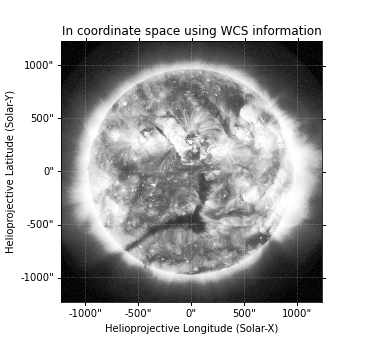
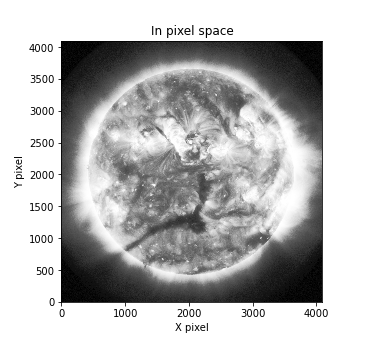
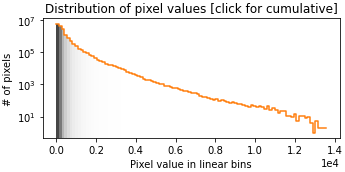
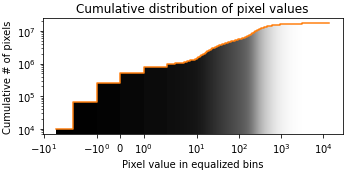

In [ ]:
m = sunpy.map.Map(sample_data.AIA_193_IMAGE)
m

In [ ]:
m_updated_pointing = update_pointing(m)

In [ ]:
m_registered = register(m_updated_pointing)

In [ ]:
print(m_registered.scale)
print(m_registered.rotation_matrix)

SpatialPair(axis1=<Quantity 0.6 arcsec / pix>, axis2=<Quantity 0.6 arcsec / pix>)
[[1.00000000e+00 2.00829943e-19]
 [8.85438494e-20 1.00000000e+00]]


Observatory,SDO
Instrument,AIA 2
Detector,AIA
Measurement,193.0 Angstrom
Wavelength,193.0 Angstrom
Observation Date,2013-03-15 12:01:06
Exposure Time,1.999635 s
Dimension,[4096. 4096.] pix
Coordinate System,helioprojective
Scale,[0.6 0.6] arcsec / pix
Reference Pixel,[2047.5 2047.5] pix

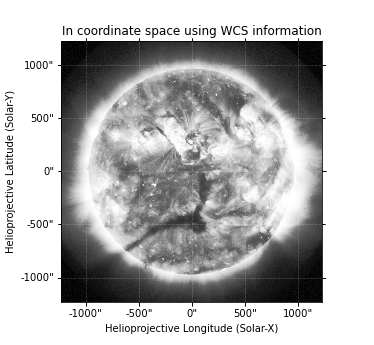
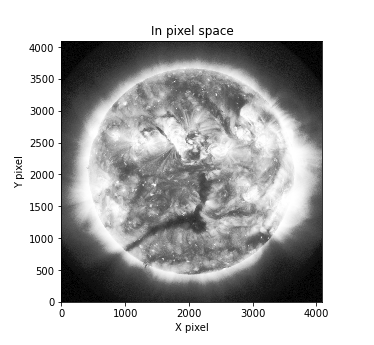
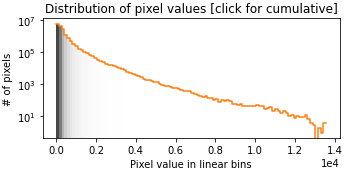
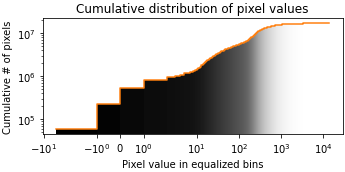

In [ ]:
m_registered

In [ ]:
dir(m)

['__abstractmethods__',
 '__add__',
 '__array_ufunc__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__pow__',
 '__radd__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rmul__',
 '__rsub__',
 '__rtruediv__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__sub__',
 '__subclasshook__',
 '__truediv__',
 '__weakref__',
 '_abc_impl',
 '_as_mpl_axes',
 '_base_name',
 '_check_axes',
 '_coordinate_frame_name',
 '_data',
 '_date_obs',
 '_default_carrington_longitude',
 '_default_dsun',
 '_default_heliographic_latitude',
 '_default_heliographic_longitude',
 '_default_observer_coordinate',
 '_default_time',
 '_get_cmap_name',
 '_get_date',
 '_get_lon_lat',
 '_mask',
 '_meta',
 '_meta_hash',
 '_new_instance',
 '_new_instance_from_op',
 '_nickname',
 '_parse

In [ ]:
print(m.date)
print(m.detector)
print(m.dimensions)

2013-03-15T12:01:06.840
AIA
PixelPair(x=<Quantity 4096. pix>, y=<Quantity 4096. pix>)


In [ ]:
im171=m_registered.data
print(im171.shape)

(4096, 4096)


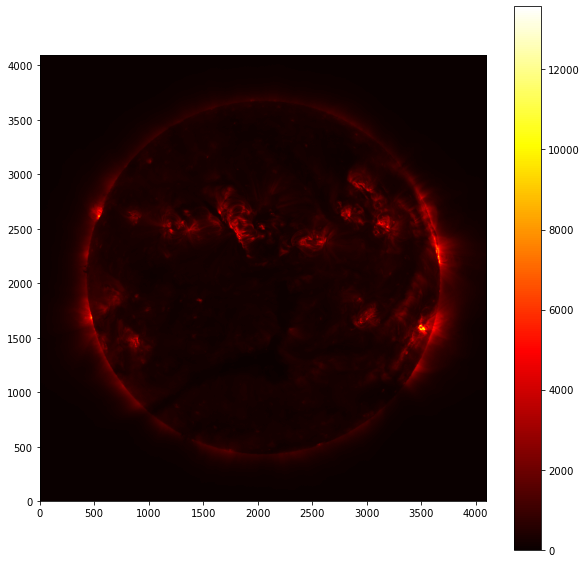

In [ ]:
plt.figure(figsize=(10,10))
plt.imshow(im171,cmap='hot',origin='lower')
plt.colorbar()
plt.show()

# Zooming into image

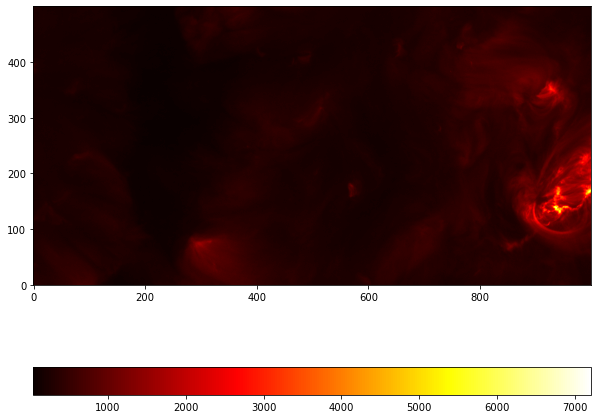

In [ ]:
plt.figure(figsize=(10,10))
plt.imshow(im171[1500:2000,2000:3000],cmap='hot',origin='lower')
plt.colorbar(orientation='horizontal')
plt.show()

# Image thresholding

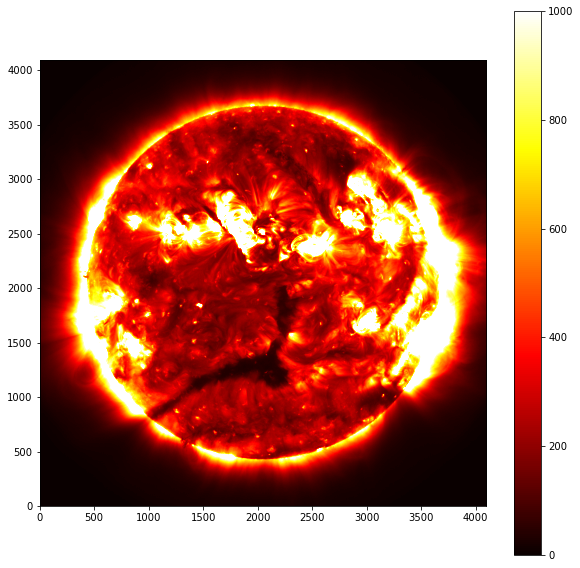

In [ ]:
plt.figure(figsize=(10,10))
plt.imshow(im171,cmap='hot',origin='lower',vmin=0,vmax=1000)
plt.colorbar()
plt.show()

# Gamma transformation

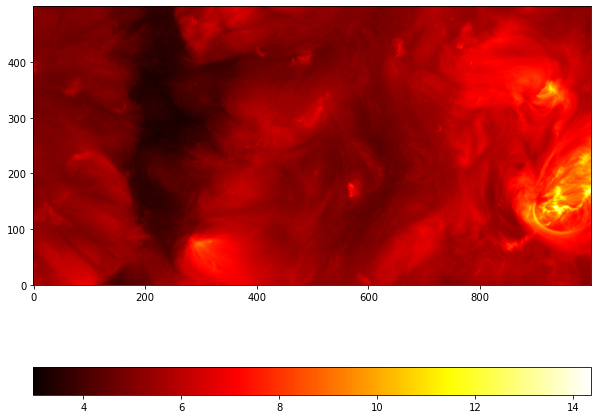

In [ ]:
plt.figure(figsize=(10,10))
plt.imshow(im171[1500:2000,2000:3000]**0.3,cmap='hot',origin='lower')
plt.colorbar(orientation='horizontal')
plt.show()

# Edge detection

In [ ]:
import cv2
sobel_im = cv2.Sobel(src=im171[1500:2000,2000:3000], ddepth=cv2.CV_64F, dx=1, dy=1, ksize=5)

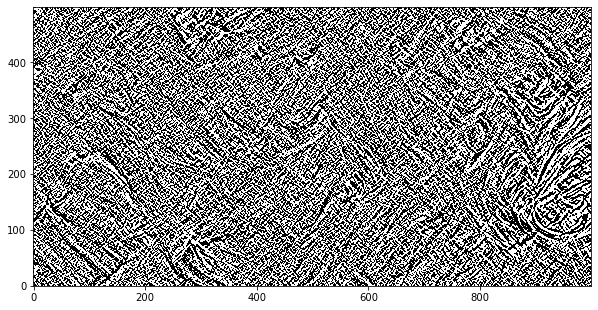

In [ ]:
plt.figure(figsize=(10,10))
plt.imshow(sobel_im,cmap='Greys',origin='lower',vmin=0,vmax=0.03)

# Unsharp Masking

In [ ]:
from skimage.filters import unsharp_mask

In [ ]:
a=im171[1500:2000,2000:3000]
sharp_im = unsharp_mask(a, radius=2, amount=10)

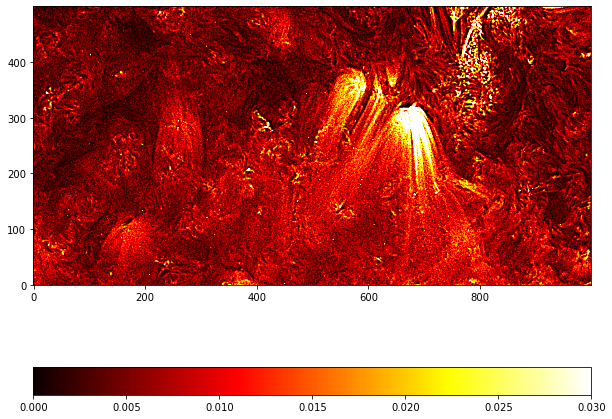

In [ ]:
plt.figure(figsize=(10,10))
plt.imshow(sharp_im,cmap='hot',origin='lower',vmin=0,vmax=0.03)
#plt.imshow(hf_im,cmap='hot',origin='lower')
plt.colorbar(orientation='horizontal')
plt.show()

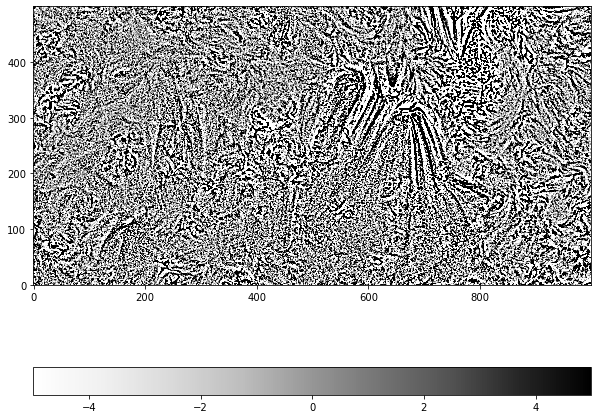

In [ ]:
im_blurred = cv2.GaussianBlur(im171,(11,11),2)
hf_im=im171-im_blurred
plt.figure(figsize=(10,10))
plt.imshow(hf_im[1500:2000,2000:3000],cmap='Greys',origin='lower',vmin=-5,vmax=5)
#plt.imshow(hf_im,cmap='hot',origin='lower')
plt.colorbar(orientation='horizontal')
plt.show()